In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm
from glob import glob
from keras.utils import load_img, img_to_array

In [ ]:
X_train = np.load('/content/gdrive/MyDrive/Breast Cancer Detection/Data/X_train.npy')
y_train = np.load('/content/gdrive/MyDrive/Breast Cancer Detection/Data/y_train.npy')
X_val = np.load('/content/gdrive/MyDrive/Breast Cancer Detection/Data/X_val.npy')
y_val = np.load('/content/gdrive/MyDrive/Breast Cancer Detection/Data/y_val.npy')
X_test = np.load('/content/gdrive/MyDrive/Breast Cancer Detection/Data/X_test.npy')
y_test = np.load('/content/gdrive/MyDrive/Breast Cancer Detection/Data/y_test.npy')

In [ ]:
print('X_train shape : {}' .format(X_train.shape))
print('X_val shape : {}' .format(X_val.shape))
print('X_test shape : {}' .format(X_test.shape))
print('y_train shape : {}' .format(y_train.shape))
print('y_val shape : {}' .format(y_val.shape))
print('y_test shape : {}' .format(y_test.shape))

X_train shape : (120000, 50, 50, 3)
X_val shape : (15000, 50, 50, 3)
X_test shape : (15000, 50, 50, 3)
y_train shape : (120000,)
y_val shape : (15000,)
y_test shape : (15000,)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(height_shift_range=0.2,
                            width_shift_range=0.2,
                            zoom_range=0.2,
                            shear_range=0.2)
train_generator = datagen.flow(X_train, y_train, batch_size=64)
val_generator = datagen.flow(X_test, y_test, batch_size=64)

In [ ]:
"""callback = keras.callbacks.ReduceLROnPlateau(
    monitor='loss',factor=0.25,patience=2, verbose=1,min_delta=0.0001,cooldown=0,min_lr=0.00001, mode='auto',
)

es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3, restore_best_weights=True)"""

In [ ]:
#import tensorflow as tf

model = keras.Sequential([
keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (50,50, 3)),
keras.layers.MaxPooling2D(strides = 2),
keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
keras.layers.MaxPooling2D((3, 3),strides = 2),
keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
keras.layers.MaxPooling2D((3, 3),strides =2),
keras.layers.Conv2D(256, (3, 3), padding = 'same', activation = 'relu'),
keras.layers.MaxPooling2D((3, 3),strides =2),
keras.layers.Flatten(),
keras.layers.Reshape((-1,256)),
keras.layers.LSTM(128, return_sequences=False),
keras.layers.Dense(512, activation='relu'),
keras.layers.Dense(128, activation = 'relu'),
keras.layers.Dense(1, activation = "sigmoid") 
#tf.keras.layers.Dense(2, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 128)        0

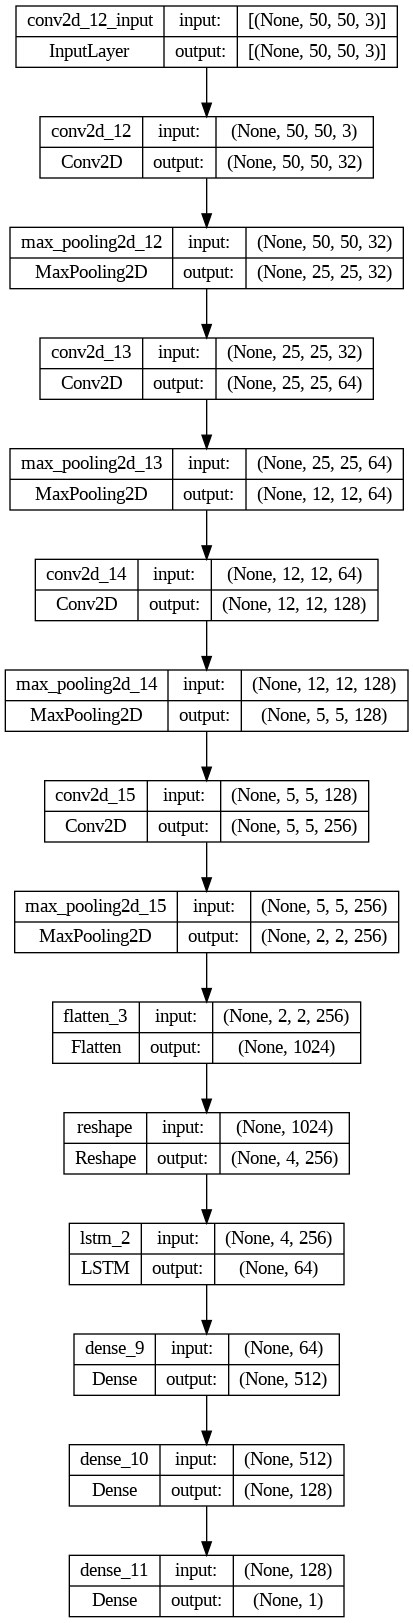

In [ ]:
keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
# Early stopping (stop training after the validation loss reaches the minimum)
earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights=True)

# Callback for checkpointing
checkpoint = keras.callbacks.ModelCheckpoint('/content/gdrive/MyDrive/Breast Cancer Detection/models/CNN_LSTM2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True, save_freq='epoch')

model.compile(optimizer=keras.optimizers.Adam(),loss='binary_crossentropy',metrics=['accuracy', keras.metrics.AUC(name='auc')])

In [ ]:
history = model.fit(train_generator, validation_data=val_generator, epochs = 20, callbacks=[checkpoint, earlystopping])
model.save('/content/gdrive/MyDrive/Breast Cancer Detection/models/CNN_LSTM_Last2.h5')

Epoch 1/20
 340/1875 [====>.........................] - ETA: 9:59 - loss: 0.4995 - accuracy: 0.7718 - auc: 0.8364 

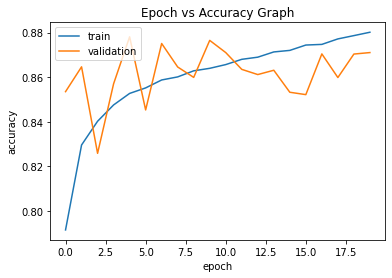

In [ ]:
#history = history2
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Epoch vs Accuracy Graph')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'],loc='upper left')
plt.show()

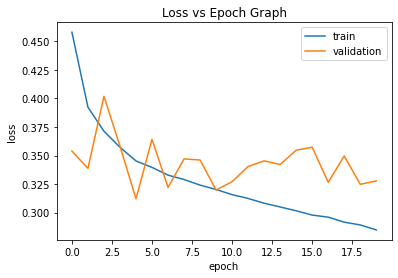

In [ ]:
abc='Loss vs Epoch Graph_250'
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Epoch Graph')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'],loc='upper right')
plt.show()

469/469 [==============================] - 13s 8ms/step
              precision    recall  f1-score   support

      Benign     0.8895    0.8708    0.8801      7500
   Malignant     0.8735    0.8919    0.8826      7500

    accuracy                         0.8813     15000
   macro avg     0.8815    0.8813    0.8813     15000
weighted avg     0.8815    0.8813    0.8813     15000

AUC Score :  0.9412430933333331


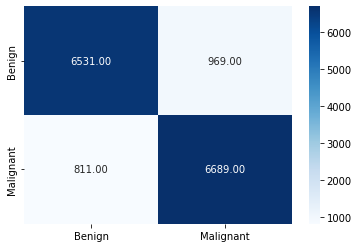

In [ ]:
model = keras.models.load_model('/content/gdrive/MyDrive/Breast Cancer Detection/models/CNN_LSTM.h5')

pred = model.predict(X_test)

res = []
for prediction in pred:
    if(prediction > 0.5):
        res.append(1)
    else:
        res.append(0)
        
from sklearn.metrics import classification_report, confusion_matrix
conf = confusion_matrix(y_test, res)
sns.heatmap(conf,annot=True,fmt='0.2f',cmap='Blues',xticklabels=['Benign','Malignant'],yticklabels=['Benign','Malignant'])
print(classification_report(y_test, res, target_names=['Benign','Malignant'], digits=4))

from sklearn.metrics import roc_curve,roc_auc_score
pred_prob = pred

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc score
auc_score = roc_auc_score(y_test, pred_prob[:])

print('AUC Score : ',auc_score)

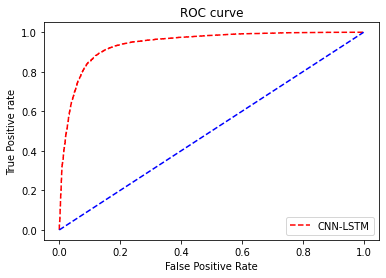

In [ ]:
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='CNN-LSTM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

<Axes: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

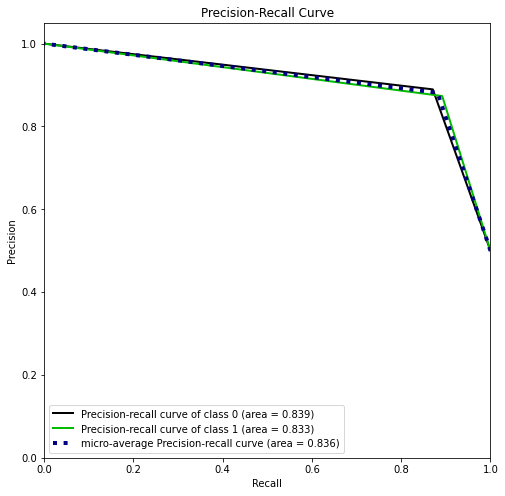

In [ ]:
!pip install scikit-plot
import scikitplot as skplt

predictions = keras.utils.to_categorical(res, num_classes=2)

skplt.metrics.plot_precision_recall(
    y_test,
    predictions,
    figsize=(8,8))

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

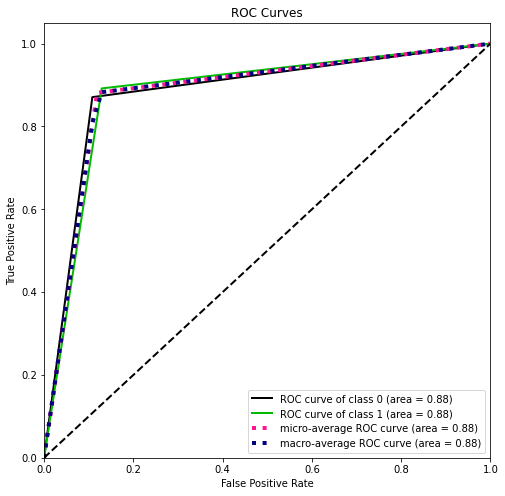

In [ ]:
skplt.metrics.plot_roc(
    y_test,
    predictions,
    figsize=(8,8))

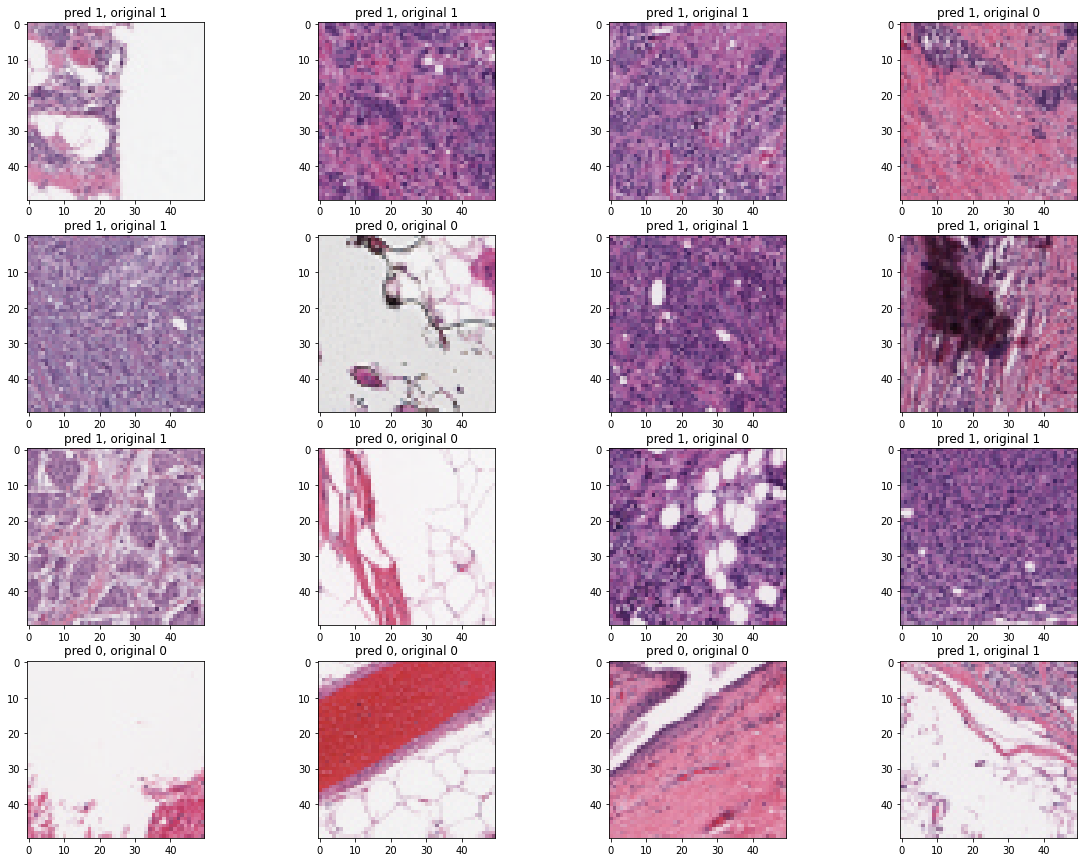

In [ ]:
plt.figure(figsize= (20,15))
ind = np.random.randint(0, len(pred), 16)
i=0
for loc in ind:
    plt.subplot(4,4,i+1)
    plt.xlabel(None)
    plt.title(f"pred {res[loc]}, original {y_test[loc]}")
        
    plt.imshow(X_test[loc])
    i+=1